In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('cricket_del.csv')

In [3]:
data.sample(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
108371,457,2,Chennai Super Kings,Mumbai Indians,14,6,MS Dhoni,R Ashwin,SL Malinga,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1823,8,2,Kings XI Punjab,Royal Challengers Bangalore,4,4,HM Amla,M Vohra,SR Watson,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
data.columns


Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


Text(0, 0.5, 'Number of balls bowled')

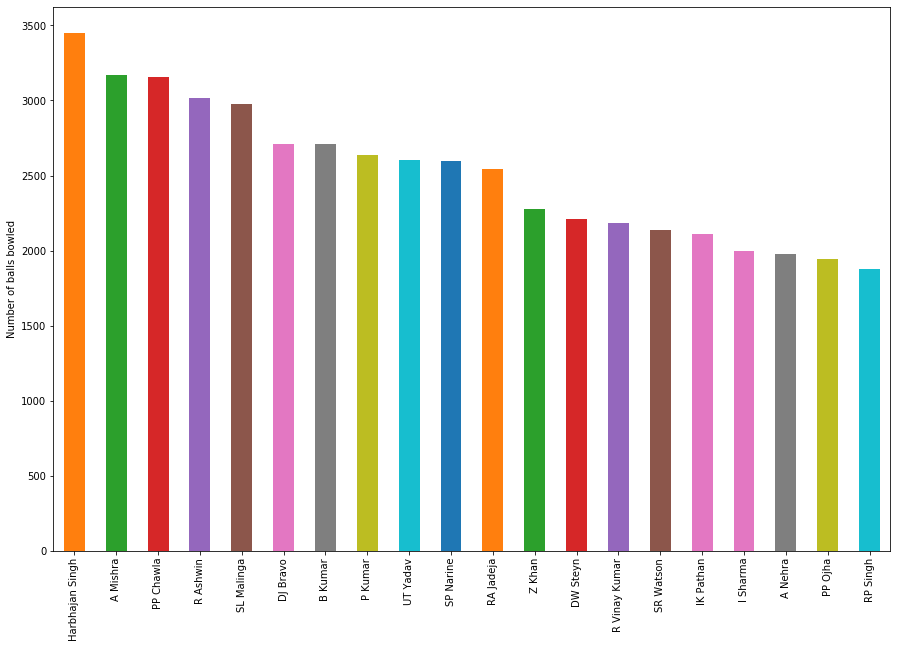

In [6]:
plt.figure(figsize = (15,10))
data.bowler.value_counts()[:20].plot(kind = 'bar',colors = ['C1', 'C2', 'C3', 'C4', 'C5','C6', 'C7', 'C8','C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C16', 'C17', 'C18', 'C19'])
plt.ylabel("Number of balls bowled")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


Text(0, 0.5, 'no. of  dismissels by the batsman')

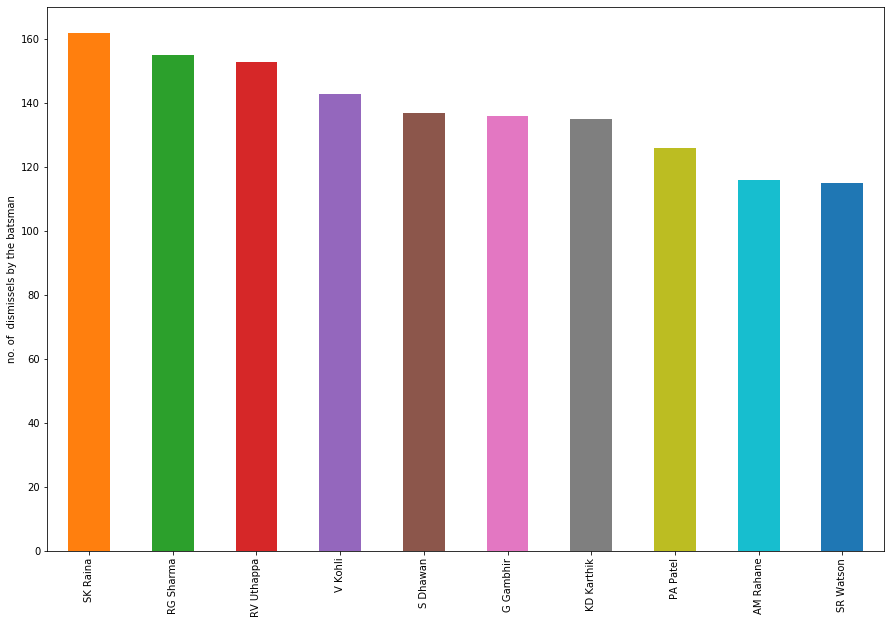

In [7]:
plt.figure(figsize = (15, 10))
data.player_dismissed.value_counts()[:10].plot(kind = 'bar', colors = ['C1', 'C2', 'C3', 'C4', 'C5','C6', 'C7', 'C8','C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C16', 'C17', 'C18', 'C19'])
plt.ylabel('no. of  dismissels by the batsman')

### This copy of the data is for dealing with player_dismissed and fielder visulization

In [8]:
bow_data = data.copy()
    

In [9]:
bow_data = bow_data.dropna()

Text(0.5, 1.0, 'Bowlers having the higest wickets')

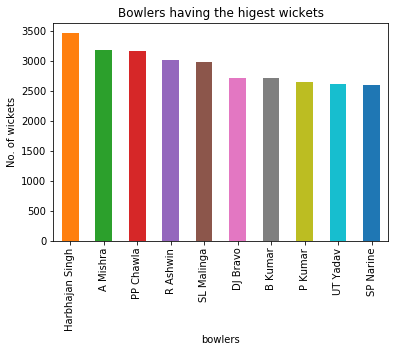

In [10]:
#Bowler's having the high demand and more wicktes
data.bowler.value_counts()[:10].plot(kind = 'bar', colors = ['C1', 'C2', 'C3', 'C4', 'C5','C6', 'C7', 'C8','C9', 'C10'])
plt.xlabel('bowlers')
plt.ylabel('No. of wickets')
plt.title("Bowlers having the higest wickets")

Text(0.5, 1.0, 'fielders taking the most catches')

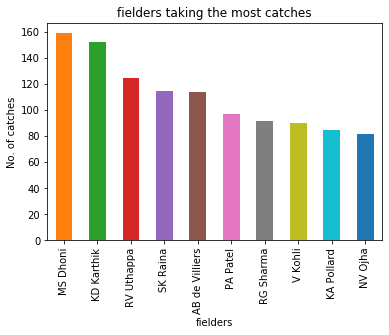

In [11]:
#Good fielder's around all the matches
data.fielder.value_counts()[:10].plot(kind = 'bar', colors = ['C1', 'C2', 'C3', 'C4', 'C5','C6', 'C7', 'C8','C9', 'C10'])
plt.xlabel('fielders')
plt.ylabel('No. of catches')
plt.title("fielders taking the most catches")

Text(0.5, 1.0, 'dismissal kind count')

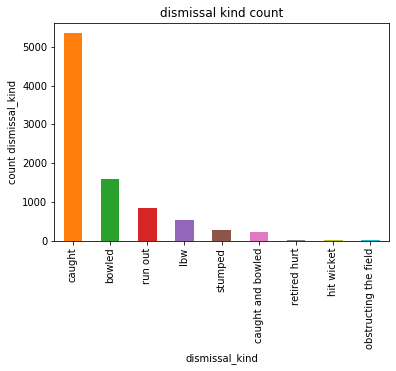

In [12]:
#Dismissal type in all the matches
data.dismissal_kind.value_counts()[:10].plot(kind = 'bar', colors = ['C1', 'C2', 'C3', 'C4', 'C5','C6', 'C7', 'C8','C9', 'C10'])
plt.xlabel('dismissal_kind')
plt.ylabel('count dismissal_kind')
plt.title("dismissal kind count")

In [13]:
batsman_list = list(data.batsman.unique()) # batsman list
bowler_list = list(data.bowler.unique()) # bowlers list

In [14]:
# To get the best bowlers for the particular batsman
def best_bowler_for_batsman(data, batsman_name):
    return data[data.batsman== batsman_name].bowler.value_counts()[:5].plot(kind = 'bar', colors = ['C1', 'C2', 'C3', 'C4', 'C5','C6', 'C7', 'C8','C9', 'C10'])

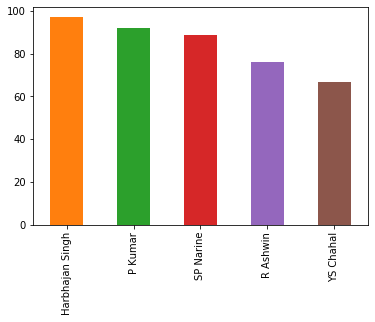

In [15]:
best_bowler_for_batsman(data, 'DA Warner')

In [16]:

def bowler_for_batsman_for_match(data, batting_team_name, bowling_team_name, batsman_name):
    return data[(data.bowling_team == bowling_team_name) & (data.batting_team == batting_team_name) & (data.batsman== batsman_name)].bowler.value_counts()[:5].plot(kind = 'bar', colors = ['C1', 'C2', 'C3', 'C4', 'C5','C6', 'C7', 'C8','C9', 'C10'])

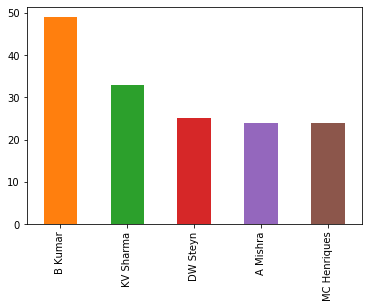

In [17]:
bowler_for_batsman_for_match(data,'Royal Challengers Bangalore','Sunrisers Hyderabad', 'V Kohli'  )

In [18]:
#batsman who can scores more runs for this below bowlers
def bowler_for_batsman_for_runs(data, batting_team_name, bowling_team_name, batsman_name):
    raw_data =  data[(data.bowling_team == bowling_team_name) & (data.batting_team == batting_team_name) & (data.batsman== batsman_name)]
    fig = plt.figure(figsize = (15, 12))
    return raw_data.groupby('bowler').total_runs.sum().plot(kind = 'bar',colors = ['C1', 'C2', 'C3', 'C4', 'C5','C6', 'C7', 'C8','C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C16', 'C17', 'C18', 'C19'] )

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


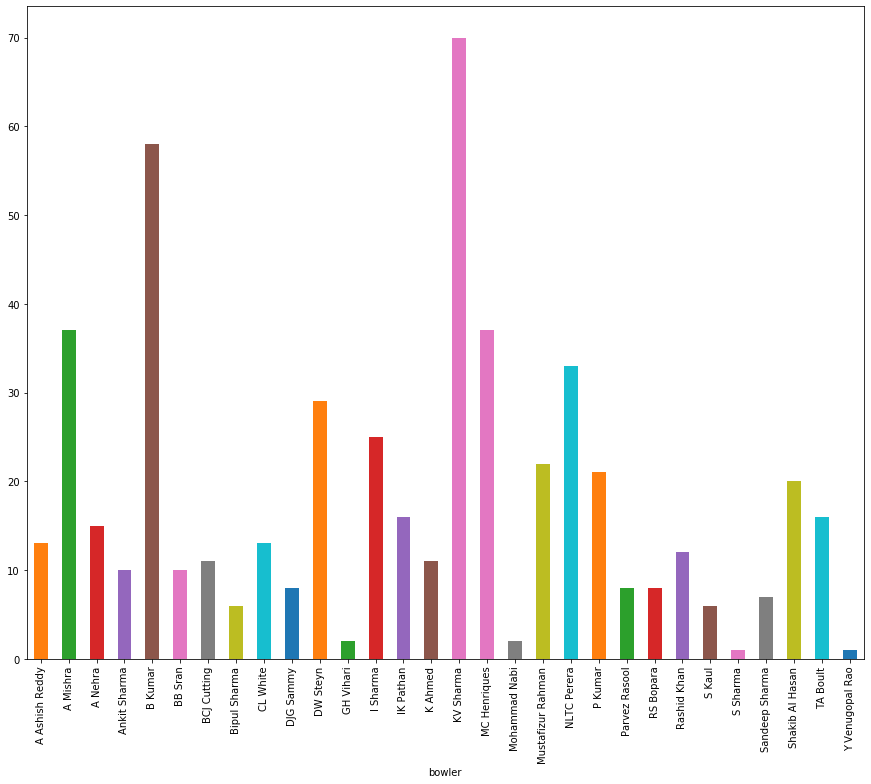

In [19]:
bowler_for_batsman_for_runs(data,'Royal Challengers Bangalore','Sunrisers Hyderabad', 'V Kohli'  )

In [20]:
def bowlers_noballs(data):
    m = data.groupby('bowler').noball_runs.sum()
    return pd.Series(data = m.values, index = m.index).sort_values(ascending= False)[:10].plot(kind = 'bar',colors = ['C1', 'C2', 'C3', 'C4', 'C5','C6', 'C7', 'C8','C9', 'C10', 'C11', 'C12', 'C13', 'C18', 'C19'] )
    plt.ylabel('count of number of no balls ')
    plt.title('top bowlers bowling higest no balls')

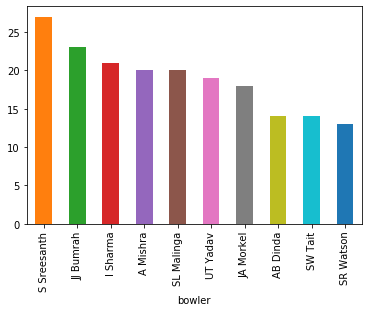

In [21]:
bowlers_noballs(data)

In [22]:
def bowlers_penaulty(data):
    m = data.groupby('bowler').penalty_runs.sum()
    return pd.Series(data = m.values, index = m.index).sort_values(ascending= False)[:10].plot(kind = 'bar',colors = ['C1', 'C2', 'C3', 'C4', 'C5','C6', 'C7', 'C8','C9', 'C10', 'C11', 'C12', 'C13', 'C18', 'C19'] )
    plt.ylabel('count of number penaulty runs ')
    plt.title('top bowlers having higest penaulty runs')

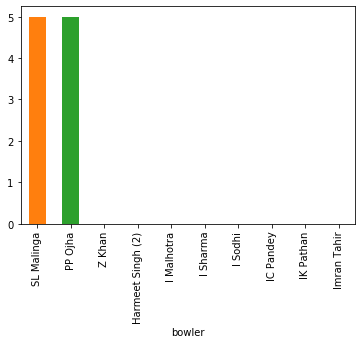

In [23]:
bowlers_penaulty(data)

In [24]:
def bowlers_legbyeruns(data):
    m = data.groupby('bowler').noball_runs.sum()
    return pd.Series(data = m.values, index = m.index).sort_values(ascending= False)[:10].plot(kind = 'bar',colors = ['C1', 'C2', 'C3', 'C4', 'C5','C6', 'C7', 'C8','C9', 'C10', 'C11', 'C12', 'C13', 'C18', 'C19'] )
    plt.ylabel('count of number of legbye runs ')
    plt.title('top bowlers bowling higest legbye runs')

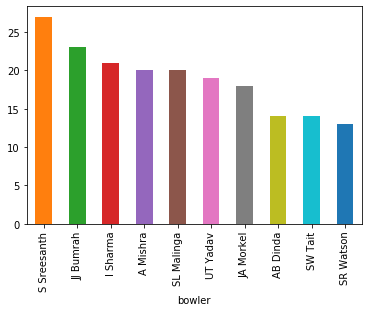

In [25]:
bowlers_legbyeruns(data)

Text(0.5, 1.0, 'top bowlers who is given the higest bye_runs')

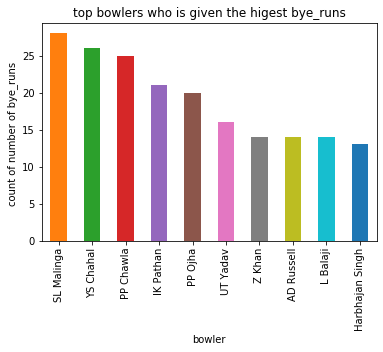

In [26]:
m = data.groupby('bowler').bye_runs.sum()
pd.Series(data = m.values, index = m.index).sort_values(ascending= False)[:10].plot(kind = 'bar',colors = ['C1', 'C2', 'C3', 'C4', 'C5','C6', 'C7', 'C8','C9', 'C10', 'C11', 'C12', 'C13', 'C18', 'C19'] )
plt.ylabel('count of number of bye_runs ')
plt.title('top bowlers who is given the higest bye_runs')

In [27]:
def bowlers_batsman_runs(data):
    m = data.groupby('bowler').noball_runs.sum()
    return pd.Series(data = m.values, index = m.index).sort_values(ascending= False)[:10].plot(kind = 'bar',colors = ['C1', 'C2', 'C3', 'C4', 'C5','C6', 'C7', 'C8','C9', 'C10', 'C11', 'C12', 'C13', 'C18', 'C19'] )
    plt.ylabel('count of number of no balls ')
    plt.title('top bowlers bowling higest no balls')

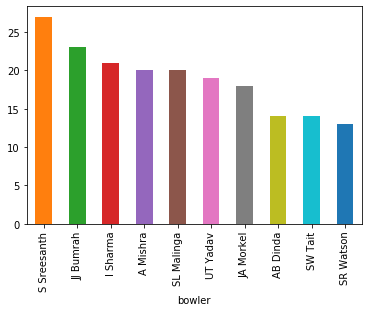

In [28]:
bowlers_batsman_runs(data)

### Concering the teams
### Planning for the winning statergy

In [29]:
data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [30]:
data.over.unique()[4]

5

In [31]:
# creating the set for the first 6 over play
def team_stra(data, batsman_team_name, bowling_team_name):
    team_new = data[(data.batsman_team == batsman_team) & (data.bowler_team== bowler_team)]
    bowlers_list =  []
    for i in range(len(team_new.batsman.unique())):
        if bowler_list.count(bowler_name) >=2:
            bowler = team_new[ (team_new.batsman = team_new.batsman.unique()[i])].bowler.value_counts()[:1].index

SyntaxError: invalid syntax (<ipython-input-31-c49d3d99f653>, line 7)

In [43]:
data.groupby('bowler').total_runs.mean()

bowler
A Ashish Reddy    1.481481
A Chandila        1.047009
A Choudhary       1.333333
A Dananjaya       1.920000
A Flintoff        1.606061
                    ...   
YA Abdulla        1.400901
YK Pathan         1.218750
YS Chahal         1.312330
Yuvraj Singh      1.238095
Z Khan            1.256591
Name: total_runs, Length: 405, dtype: float64

In [41]:
mm = data.groupby('bowler').total_runs.sum()/data.bowler.value_counts()
kk = pd.Series(data = mm.values, index = mm.index)
kk.sort_values(ascending = False)

I Malhotra      3.833333
LPC Silva       3.500000
B Chipli        3.333333
P Prasanth      3.000000
SN Khan         3.000000
                  ...   
AM Rahane       0.833333
S Dube          0.818182
Sachin Baby     0.800000
NB Singh        0.720000
AC Gilchrist    0.000000
Length: 405, dtype: float64